## Minimal Neural Network Case Study

### Train a Softmax Linear Classifier

In [1]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

%load_ext autoreload
%autoreload 2

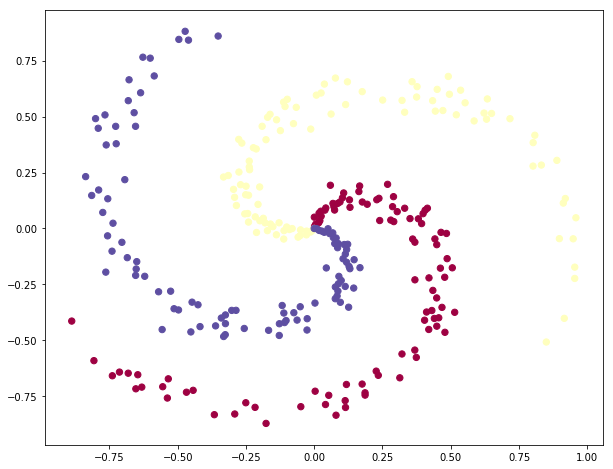

In [2]:
# Generate the spiral classification data set
np.random.seed(0)
N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype=np.int8)

for j in range(K):
    ix = range(j*N, (j+1)*N)
    r = np.linspace(0.0, 1, N) # radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r*np.cos(t)]
    y[ix] = j

# Visualise the data set
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [3]:
# Init the hyperparams
learn_rate = 1e-0
reg = 1e-3
epochs = 200

# Define the Softmax classifier
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

n_examples = X.shape[0]
# Gradient descent loop
for epoch_i in range(epochs):
    
    # 1. Perform the forward pass
    # Compute the class scores and loss
    logits = np.dot(X, W) + b

    softmax = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)
    cross_entropy = -np.log(softmax[range(n_examples), y])
    data_loss = np.mean(cross_entropy)
    reg_loss = 0.5* reg * np.sum(W * W)
    loss = data_loss + reg_loss
    
    if epoch_i % 10 == 0:
        print("Epochs: {0}/{1} Loss: {2}".format(epoch_i, epochs, loss))

    # 2. Backpropate the gradient to the parameters (W,b)
    dlogits = softmax
    dlogits[range(n_examples),y] -= 1
    dlogits /= n_examples

    dW = np.dot(X.T, dlogits)
    db = np.sum(dlogits, axis=0, keepdims=True)
    dW += reg*W # regularization gradient

    # 3. Perform the param update process
    W += -learn_rate * dW
    b += -learn_rate * db

# Evaluate the training accuracy
logits = np.dot(X, W) + b
predictions = np.argmax(logits, axis=1)
print("Training Accuracy: {0:.2f}".format(np.mean(predictions == y)))

Epochs: 0/200 Loss: 1.09691944026674
Epochs: 10/200 Loss: 0.9173099343867819
Epochs: 20/200 Loss: 0.851534598751174
Epochs: 30/200 Loss: 0.8223522685336182
Epochs: 40/200 Loss: 0.8075936710480454
Epochs: 50/200 Loss: 0.7994521119771477
Epochs: 60/200 Loss: 0.7946825437639576
Epochs: 70/200 Loss: 0.7917645550096817
Epochs: 80/200 Loss: 0.7899206487151125
Epochs: 90/200 Loss: 0.7887262360502434
Epochs: 100/200 Loss: 0.7879374159123619
Epochs: 110/200 Loss: 0.7874083926278399
Epochs: 120/200 Loss: 0.7870491954012534
Epochs: 130/200 Loss: 0.7868028522056536
Epochs: 140/200 Loss: 0.7866325170480054
Epochs: 150/200 Loss: 0.7865139417486118
Epochs: 160/200 Loss: 0.7864309366276326
Epochs: 170/200 Loss: 0.7863725615959863
Epochs: 180/200 Loss: 0.7863313492423614
Epochs: 190/200 Loss: 0.7863021593695887
Training Accuracy: 0.49


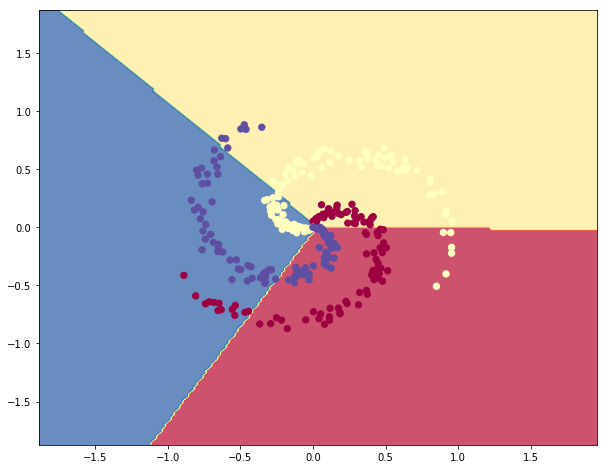

In [4]:
# Plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

### Train a 2 layer NN

In [5]:
# Define the hyper params
learn_rate = 1e-0
reg = 1e-3
epochs = 10000 

# Init the NN params
n_hidden = 100 # size of the hidden layer
W1 = 0.01 * np.random.randn(D, n_hidden)
b1 = np.zeros((1, n_hidden))

W2 = 0.01 * np.random.rand(n_hidden, K)
b2 = np.zeros((1, K))

n_examples = X.shape[0]

# Gradient Descent loop
for epoch_i in range(epochs):
    # 1. Forward pass
    # Compute the class scores and loss
    hidden_layer = np.dot(X, W1) + b1
    hidden_layer = np.maximum(0, hidden_layer) # ReLU Activiation function

    scores = np.dot(hidden_layer, W2) + b2
    softmax = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)
    
    cross_entropy = -np.log(softmax[range(n_examples), y])
    data_loss = np.mean(cross_entropy)
    reg_loss = (0.5* reg * np.sum(W1 * W1)) + \
                (0.5 * reg * np.sum(W2 * W2))
    loss = data_loss + reg_loss
    
    if epoch_i % 1000 == 0:
        print("Epochs: {0}/{1} Loss: {2}".format(epoch_i, epochs, loss))

    # 2. Backpropate the gradient to the parameters (W2, b2, W1, b1)
    # 2nd Layer
    dscores = softmax
    dscores[range(n_examples),y] -= 1
    dscores /= n_examples

    dW2 = np.dot(hidden_layer.T, dscores) + reg * W2
    db2 = np.sum(dscores, axis=0, keepdims=True)
    dhidden_layer = np.dot(dscores, W2.T)
    dhidden_layer[hidden_layer <= 0] = 0 # ReLU gradient

    # 1st Layer
    dW1 = np.dot(X.T, dhidden_layer) + reg * W1
    db1 = np.sum(dhidden_layer, axis=0, keepdims=True)
    
    # 3. Perform the param update process
    W2 += -learn_rate * dW2
    b2 += -learn_rate * db2
    W1 += -learn_rate * dW1
    b1 += -learn_rate * db1
    
# Training accuracy
hidden_layer = np.maximum(0, np.dot(X, W1) + b1)
scores = np.dot(hidden_layer, W2) + b2
predictions = np.argmax(scores, axis=1)
print("Training accuracy: {0:.2f}".format(np.mean(predictions == y)))

Epochs: 0/10000 Loss: 1.098677179004552
Epochs: 1000/10000 Loss: 0.3955542375078918
Epochs: 2000/10000 Loss: 0.2724956672754707
Epochs: 3000/10000 Loss: 0.2668236927647696
Epochs: 4000/10000 Loss: 0.2525468305869438
Epochs: 5000/10000 Loss: 0.2494361719815152
Epochs: 6000/10000 Loss: 0.24892043712150294
Epochs: 7000/10000 Loss: 0.24869609740791448
Epochs: 8000/10000 Loss: 0.2482560731657445
Epochs: 9000/10000 Loss: 0.24810383977260703
Training accuracy: 0.98


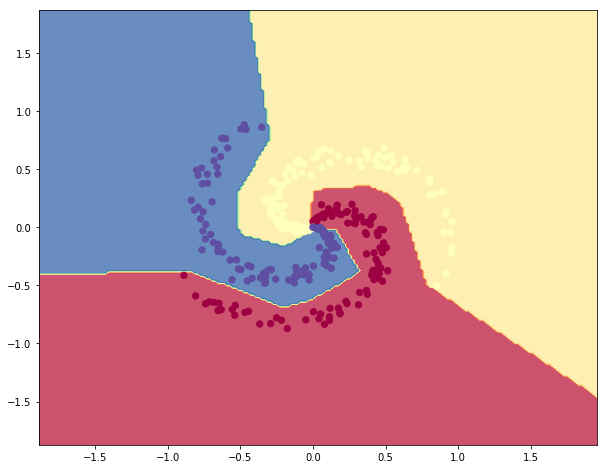

In [6]:
# Visualise the 2 Layer NN
step = 0.02
xmin, xmax = X[:, 0].min() - 1, X[:, 0].max() + 1
ymin, ymax = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(xmin, xmax, step),
                     np.arange(ymin, ymax, step))

hidden_layer = np.dot(np.c_[np.ravel(xx), np.ravel(yy)], W1) + b1
hidden_layer = np.maximum(0, hidden_layer)
scores = np.dot(hidden_layer, W2) + b2
predictions = np.argmax(scores, axis=1)
predictions = predictions.reshape(xx.shape)

plt.contourf(xx, yy, predictions, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)